In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-shooting-naive)


Let's first examine the shooting approach for the TPBVP from {numref}`Example {number} <example-tpbvp-mems>` with $\lambda=0.6$.

In [2]:
lamb = 0.6
phi = lambda r, w, dw_dr: lamb / w**2 - dw_dr / r

We convert the ODE to a first-order system in order to apply a numerical method. We also have to truncate the domain to avoid division by zero.

In [3]:
f = lambda r, y: hstack([y[1], phi(r, y[0], y[1])])
a, b = finfo(float).eps, 1

The BVP specifies $w'(0)=y_2(0)=0$. We can try multiple values for the unknown $w(0)=y_1(0)$ and plot the solutions.

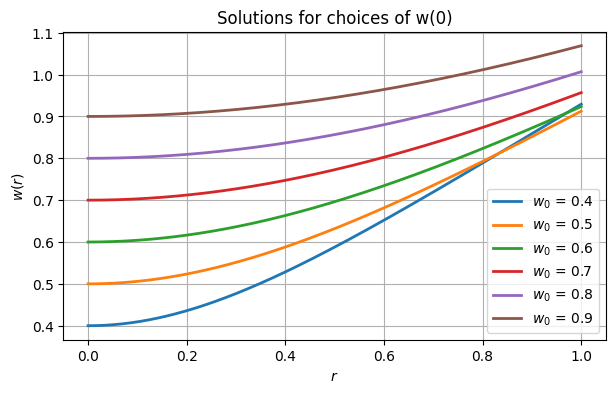

In [4]:
from scipy.integrate import solve_ivp
t = linspace(a, b, 400)
for w0 in arange(0.4, 1.0, 0.1):
    sol = solve_ivp(f, [a, b], [w0, 0], t_eval=t)
    plot(t, sol.y[0], label=f"$w_0$ = {w0:.1f}")

xlabel("$r$"),  ylabel("$w(r)$")
legend(),  grid(True)
title("Solutions for choices of w(0)");

On the graph, it's the curve starting at $w(0)=0.8$ that comes closest to the required condition $w(1)=1$, but it's a bit too large.